<a href="https://colab.research.google.com/github/itslouisgs/comp6639-linear-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yXjWrCmalvi7UhdxUi85KAU2IJ2KQE1Q?usp=sharing)

Original code from https://github.com/andrychowanda/COMP6577/blob/master/COMP6577-2.ipynb

Import required packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load & profile the data

In [2]:
!wget https://raw.githubusercontent.com/itslouisgs/comp6639-linear-regression/main/tallest_buildings_global.csv

--2021-12-11 05:51:11--  https://raw.githubusercontent.com/itslouisgs/comp6639-linear-regression/main/tallest_buildings_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5211 (5.1K) [text/plain]
Saving to: ‘tallest_buildings_global.csv’

tallest_buildings_g 100%[===================>]   5.09K  --.-KB/s    in 0s      

2021-12-11 05:51:12 (65.1 MB/s) - ‘tallest_buildings_global.csv’ saved [5211/5211]



In [3]:
data = pd.read_csv("tallest_buildings_global.csv")
print(data.dtypes)
print("-----")
print(data.isna().values.any())

rank                     int64
name                    object
height_m               float64
height_ft                int64
year_built               int64
floors_above             int64
floors_below_ground    float64
city                    object
country                 object
dtype: object
-----
True


In [4]:
print(data.info())
print("-----")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 78 non-null     int64  
 1   name                 78 non-null     object 
 2   height_m             78 non-null     float64
 3   height_ft            78 non-null     int64  
 4   year_built           78 non-null     int64  
 5   floors_above         78 non-null     int64  
 6   floors_below_ground  67 non-null     float64
 7   city                 78 non-null     object 
 8   country              78 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 5.6+ KB
None
-----
            rank    height_m  ...  floors_above  floors_below_ground
count  78.000000   78.000000  ...     78.000000            67.000000
mean   39.500000  427.306410  ...     87.705128             4.000000
std    22.660538   84.193166  ...     17.793264             1.381699

Select particular column, and visualise the data (histogram)

                                   name  year_built  height_m  floors_above
0                          Burj Khalifa        2010     828.0           163
1                           Merdeka 118        2022     678.9           118
2                        Shanghai Tower        2015     632.0           128
3             Abraj Al-Bait Clock Tower        2012     601.0           120
4  Ping An International Finance Centre        2017     599.1           115


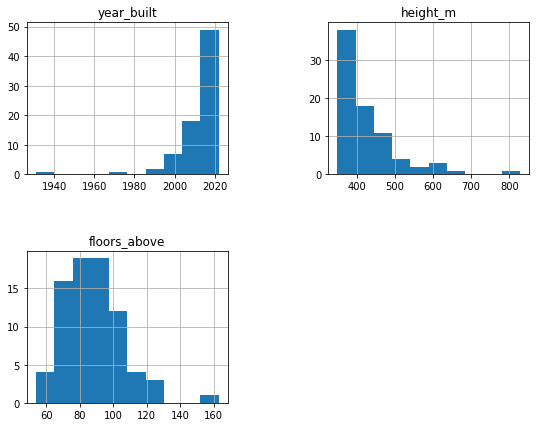

In [11]:
newData = data[["name", "year_built", "height_m", "floors_above"]]
print(newData.head())
newData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise the data (Scatter)

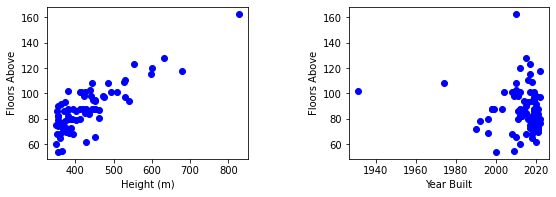

In [17]:
plt.subplot(221)
plt.scatter(newData["height_m"], newData["floors_above"], color="blue")
plt.xlabel("Height (m)")
plt.ylabel("Floors Above")

plt.subplot(222)
plt.scatter(newData["year_built"], newData["floors_above"], color="blue")
plt.xlabel("Year Built")
plt.ylabel("Floors Above")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression

In [19]:
train, test = train_test_split(newData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["height_m"]], train[["floors_above"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[0.18121038]]
Intercept:  [10.93990538]


Visualise the regression to the plot

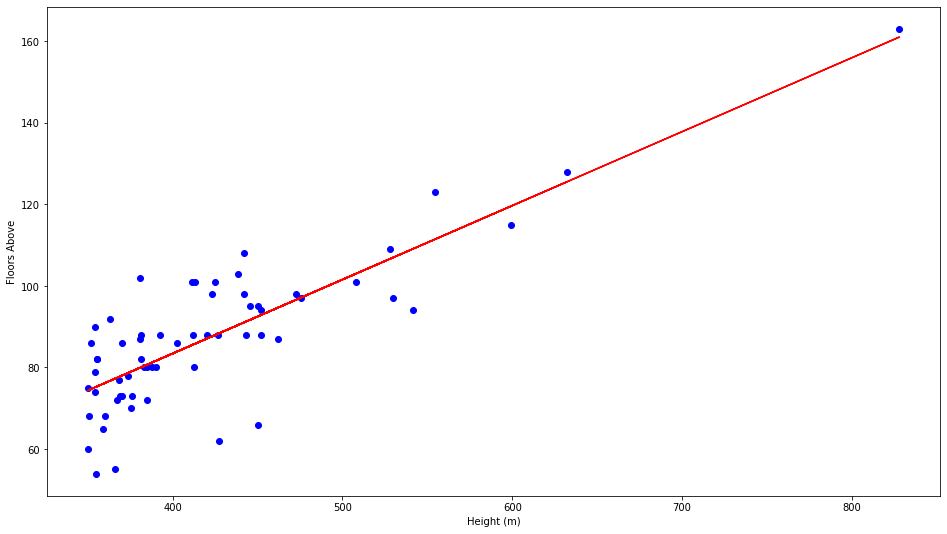

In [20]:
plt.scatter(train["height_m"], train["floors_above"],  color='blue')
plt.plot(train[["height_m"]], regression.coef_ * train[["height_m"]] + regression.intercept_, '-r')
plt.xlabel("Height (m)")
plt.ylabel("Floors Above")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Make the visualisation easier with Seaborn Package

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


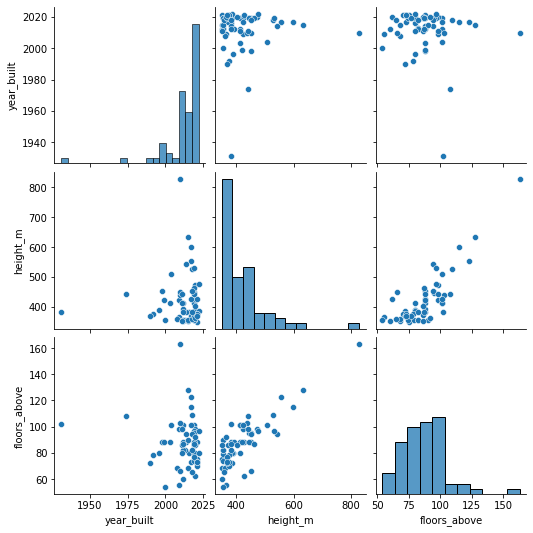

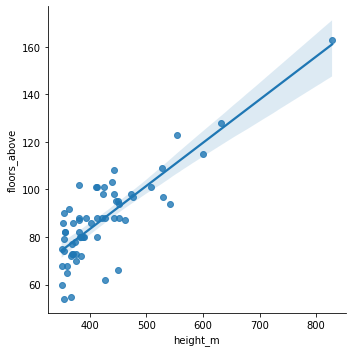

In [21]:
sb.pairplot(train)
sb.lmplot("height_m", "floors_above", data = train)
plt.show()

Predict new data & evaluate the model

In [22]:
prediction = regression.predict(test[["height_m"]])
for i in range(len(test)):
  print(test[["height_m"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["floors_above"]], prediction))
print("MSE : ", mean_squared_error(test[["floors_above"]], prediction))
print("R2 : ", r2_score(test[["floors_above"]], prediction))


[387.1] [81.08644361]
[484.] [98.64572946]
[392.5] [82.06497966]
[435.3] [89.82078394]
[384.] [80.52469143]
[358.] [75.81322154]
[356.3] [75.5051639]
[373.7] [78.65822451]
[425.7] [88.08116429]
[678.9] [133.96363259]
[401.] [83.6052679]
[492.] [100.09541251]
[530.] [106.98140696]
[461.2] [94.51413279]
[601.] [119.84734396]
[451.9] [92.82887626]
MAE :  6.997112338599769
MSE :  77.07793320240656
R2 :  0.7227256632592873
